
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [75]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
import os
os.chdir("D:\dataScience\Feature-Engineering-master\ARIMA-And-Seasonal-ARIMA-master")
%pwd

'D:\\dataScience\\Feature-Engineering-master\\ARIMA-And-Seasonal-ARIMA-master'

In [77]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [78]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [79]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [80]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

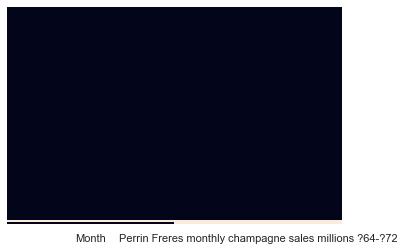

In [81]:
import seaborn as sns
sns.set()
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [82]:
df = df.dropna()
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [83]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [84]:
df['Month'] = pd.to_datetime(df['Month'])

In [85]:
df.set_index('Month', inplace = True)


In [86]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [87]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

KeyError: '[106] not found in axis'

In [9]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [10]:
df.drop(105,axis=0,inplace=True)

In [19]:
df.tail()

,Month,Sales
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


In [12]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [14]:
df.set_index('Month',inplace=True)

In [15]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [88]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

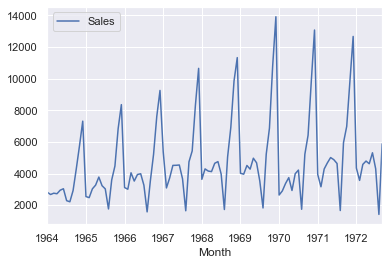

In [89]:
df.plot()

In [90]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [91]:
test_result=adfuller(df['Sales'])

In [92]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [93]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276237
p-value : 0.3639157716602447
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [94]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [95]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [96]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [97]:
df = df.rename(columns = {'Sales First Difference': 'old'})

In [98]:
list(df)

['Sales', 'old', 'Seasonal First Difference']

In [99]:
df = df.loc[:, ['Sales','Seasonal First Difference']]

In [100]:
df.head(14)

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [101]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


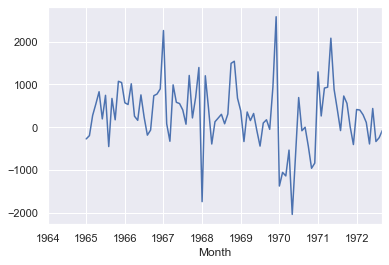

In [102]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
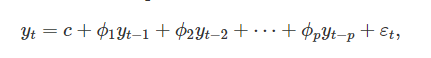

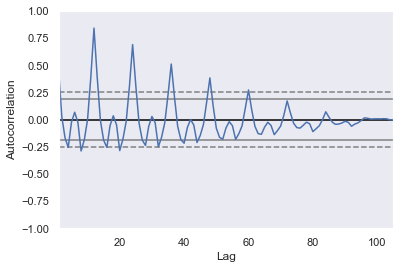

In [103]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [104]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

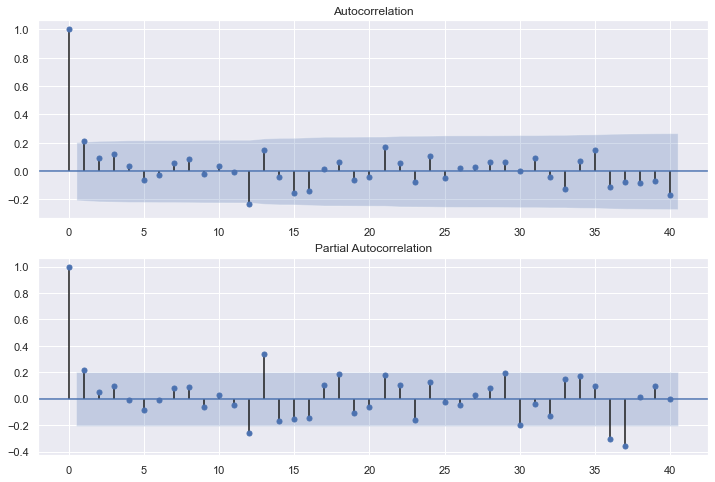

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

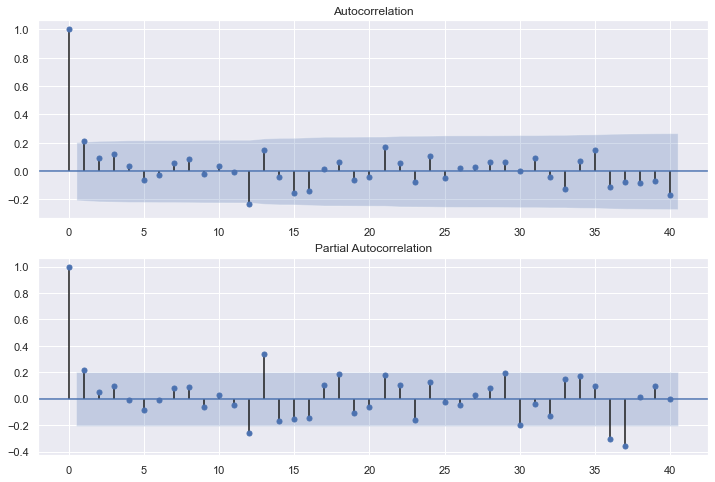

In [105]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [106]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [107]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\MaheshS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\MaheshS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [108]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 25 Apr 2020   AIC                           1910.251
Time:                        01:16:23   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7844     12.405      1.837      0.069      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

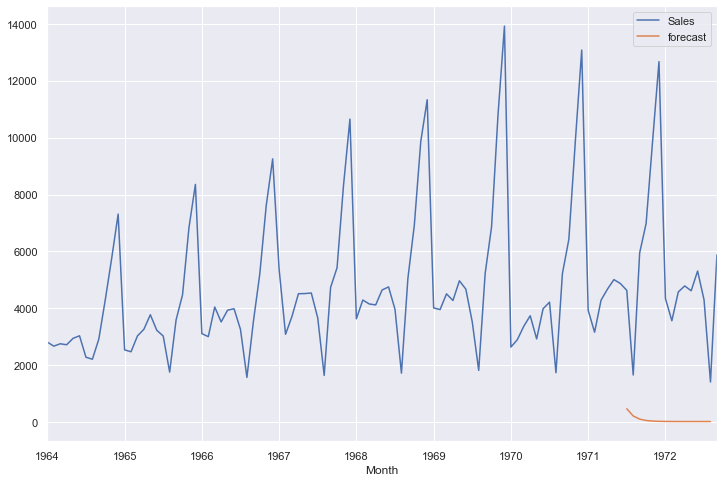

In [109]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [110]:
import statsmodels.api as sm

In [111]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\MaheshS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


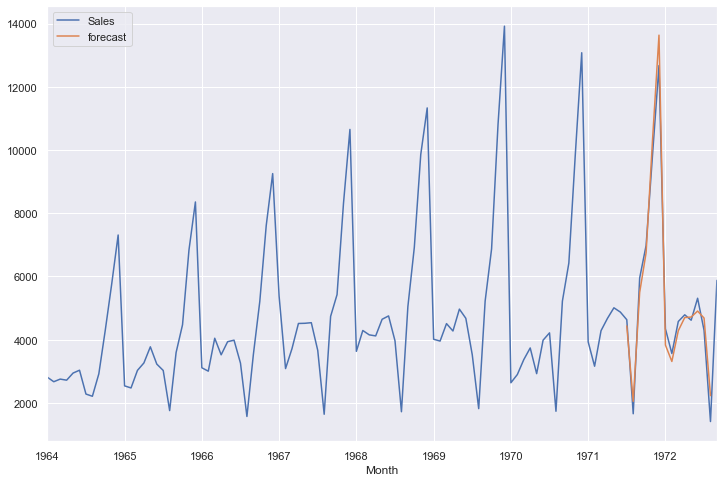

In [112]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [113]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [114]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,36)]

In [119]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [120]:
future_datest_df.tail()

,Sales,Seasonal First Difference,forecast
1975-04-01,NaN,NaN,NaN
1975-05-01,NaN,NaN,NaN
1975-06-01,NaN,NaN,NaN
1975-07-01,NaN,NaN,NaN
1975-08-01,NaN,NaN,NaN


In [121]:
future_df=pd.concat([df,future_datest_df])

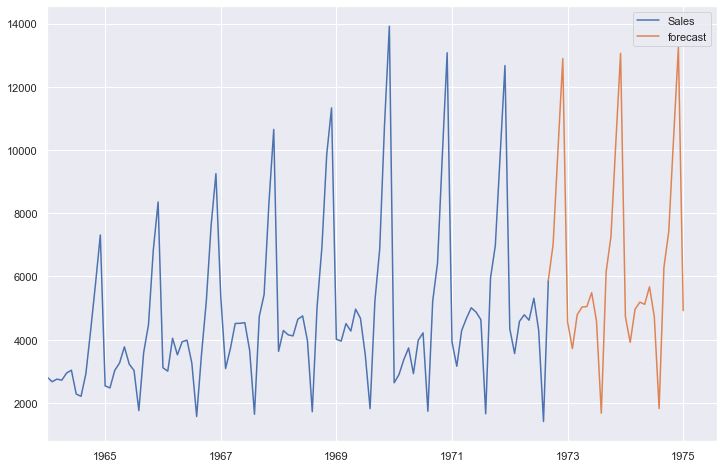

In [122]:
future_df['forecast'] = results.predict(start = 104, end = 132, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [123]:
future_df.index[-1]

Timestamp('1975-08-01 00:00:00')

In [124]:
# I want to add 3 more years tail data and predict for that
from pandas.tseries.offsets import DateOffset
fut_df = [future_df.index[-1]+DateOffset(months = x) for x in range(0,24)]
fut_df = pd.DataFrame(index = fut_df[1:],columns = df.columns)

In [125]:
fut_df.head()

,Sales,Seasonal First Difference,forecast
1975-09-01,NaN,NaN,NaN
1975-10-01,NaN,NaN,NaN
1975-11-01,NaN,NaN,NaN
1975-12-01,NaN,NaN,NaN
1976-01-01,NaN,NaN,NaN


In [126]:
fut_df.tail()

,Sales,Seasonal First Difference,forecast
1977-03-01,NaN,NaN,NaN
1977-04-01,NaN,NaN,NaN
1977-05-01,NaN,NaN,NaN
1977-06-01,NaN,NaN,NaN
1977-07-01,NaN,NaN,NaN


In [127]:
Final_df = pd.concat([future_df+fut_df])

In [128]:
type(Final_df)

pandas.core.frame.DataFrame

In [133]:
list(Final_df)

['Sales', 'Seasonal First Difference', 'forecast']

In [134]:
Final_df['forecast'] =  results.predict(start = 103, end = 156, dynamic= True)


In [135]:
Final_df.tail()

,Sales,Seasonal First Difference,forecast
1977-03-01,NaN,NaN,NaN
1977-04-01,NaN,NaN,NaN
1977-05-01,NaN,NaN,NaN
1977-06-01,NaN,NaN,NaN
1977-07-01,NaN,NaN,NaN


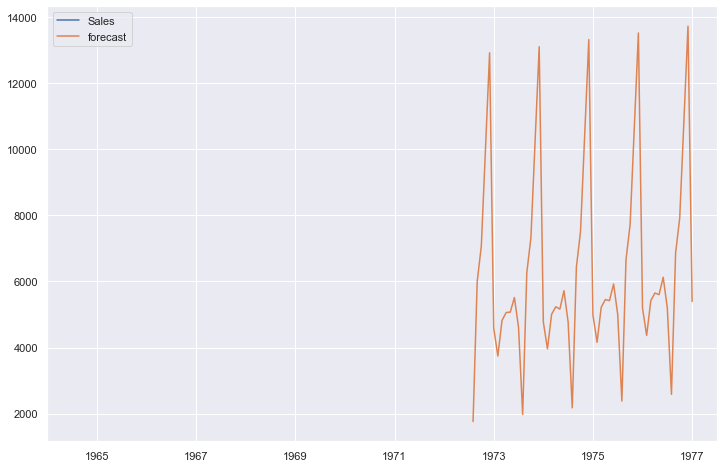

In [136]:
Final_df[['Sales','forecast']].plot(figsize=(12, 8))